<a href="https://colab.research.google.com/github/TajbeerAhamed/Digital_Image_Processing_Lab/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ID: 2125051007

Tajbeer Ahamed Rimon


Task 1:

Extract a 100×100 Region from the Center of the Image read from an URL.

Task 2:

 Convert the image to HSV color space, visualize each components in grayscale representation.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

In [3]:
image_url = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUSEhMWFhUVGB8YGRgYGBoeGhsYHRsaGBoYHhgeHSggICAlHR4YITEiJSkrLi4vGCAzODMtNygtLisBCgoKDg0OGxAQGy8jICYvMC8rMi0tLS01LS82Mi0tLS0tLy0tMC8tLS8tLy8wLS0vLS0wLS0tLSstLS01LS0vLf/AABEIAPsAyQMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAGAAMEBQcBAgj/xABAEAACAgAEBAQDBgQGAgEEAwABAgMRAAQSIQUxQVEGEyJhMnGBBxRSkaHwI0KxwTNicoLR8ZLhJBUWo8I0Q2P/xAAaAQACAwEBAAAAAAAAAAAAAAAAAwECBAUG/8QAMBEAAgIBAwIDBwQDAQEAAAAAAQIAEQMSITEEQSJRYRNxgZGhwfAFsdHhFDLxI0L/2gAMAwEAAhEDEQA/ANurCrHrCwQnkLhBcesLBCeTjox3CwQnccx5QnewOe1Hp77fPFd4k40mTy75iQFglDSvMlmCgb+5GCSqljQlnjuKbwpx9M7lxOilNyrKdyGHMWOY5G/fFxgBuSylSQeZ3HDhHHDglYidsNmT1BaO4JuthVCie5vb5HCeULZJAAFknlXUk+2ATjH2nRR5iOKFUnjcrcqSbUzFDopSG0kG7I7dziCQJdMbOaUQ8je7FEUa3H6juN+eOs24FHcdttq6/vrii8YZWPyknmnlhjyziY+W1a9PJCOtmgB74heBPE75vLyzzKEAzBRf9JCFB7m20337csRe9SRjJTWOJfZLikMzyxxSK7wtpkUHdW32P5H8j2xNAxHy3Doo3kkjjRHlIMjKoBci6LEc+Z/M4lYtKGr2nmjhVj1gM8KZ3N5jPZqaQsuVjLQRpyUsr6Sw7kaTbf5q6bQTUsqagT5Qx04VY9YWJlJ5x6GFWFghO4WODHcEJzCwsLBCLCwsLBCN5mQqjMFLFVJCrzYgXpHueWIPBM7JPDFM8TwFgS0Tj1DmADyI78ro7gYssBme+0GODOtlMxC8aggCUnYgiw5WhS3tYJ5G6o1BNcxmPGz2FFnmd8c+L3yE+VGgNDJqMhr1UukUvuNV78+XvgmbKRSxsGUSRy0xDepTYFbHatgf1xE8RcDgzsPlzCx8SuOamtmU/sEYZ4RmvKyCs/8A/RGyMQrGzDqRiFFk2UJoWTiN7lmKaF07MOftPWW43kIUhRJ8vEkouFQyIrLfNRsKJ/M4nNxaERvK0iqkd62YgBa56r5Y+XOMTZsoJswJJ/Pj1pMTqDpRsc9tBtSv8tdLGCj7P/HEM0X3LisSzRqAEmkTUFA2CyNzUDo/TrtuCz5SHVRVGz3983BOKxZrKtLlZrEkZ0SKDakggNpNMCDvRrlgd8JRTZKRsoWmzKMvmrK5sA6VBis8rayLrn8yXvDHhnI5Z3lyQMfmBQyiRmQgHUpFk7bmqNUcEBU+oA89wa5H/jkfz9sULgixBbW1IjHH8smYgkjZdUbpTLyJU6gw7g1fyIGAfhngFIly5SX/APjT+YrlR64TWqN1IoNY5gCjZ2LEg6yuaDqSNmU6XXsR/Uc6OKrN57yJDYuNtz7A0NX5kA9yR1OENl/+hxGJjN6e88+OIXzGVjyynT94kjQtZtSpMr2o6BY2689vcWvhfKRZeJMvEpCgMwJIOr1bk++49vywP8XhbMKkcUtCNxKhW9TJTRsgYEVWo2d9mGLGGVo5EaNFOqZopKABK3eq+4tefQEDnhuPIG3kOrKuj4xn7SPEkuSgjeHTrklC2wsBQpYiu5qvqcEuRzXmxRSaf8RVcAb1qXVz/vgb8cZWPM5WZJBtGjOjDmrqjMGH5EHuH98RPGfinK8OjhMpkWVIi0CL5mh2CiPQ1EKwGoEhjtQPOsMB3Mq2n2a0N7Nw31+qqPK72r5c7/TFVwXNuYow0LxhUYPrFHUhCih1DUzA9q74+dD9qnFC7smZZFZywTSjBbYsFBdSaHLn0xrH2X/aJJmz93ziqsukukooK6iywK/ykCj2IB5VvN7yAh0kgXDHwp4liz8JniV1AcoQ4F2AD0JBFEdcO8P8R5SeQwwzxvItkqpvYcyDyNe2H80lxvFF/DZlOlguylrGvoCQd6u+XfFD4U8BZbJSeajSSSVpBcr6QedBQBZ7m/1ODfaTWIhjuPIc/OFmFhYWLRMQx3HBjuCE5jzJtZC2a6VZ9rOPWFghPJBs7iq273vf05YSCgATZ7mrPvttjqsCLHI4ruEcSim1JHdwnTR9rUMD7gH3xNSL3ljeM/8AHhBzKhgsiCKvLkjRlVixOtbFhq2O9V0wezuqjW5ACj4jQofP8sZj4/4tCspm1gppVSw9QsmhVb9Ri+NQTvxKZMjIPCd4QeH/ALtLky7OY0jDK5inkjjVRdkaHCpQ51Vc9tsZB9pXFM1km+55aaRMnLFSxkqzFCWLEkkyBmZpCSdNghf5dvMHjSLJyLmMmpGo/wAZNJVJU32I+GzzDAEi/cg6lwfPcMzsSZlctliG21NBGSj9UehqRx8yCNwawrIVQ+kZj1OPWZ59hXikBzw6cKyufMgD0QJRuyC9hqA1Dl6gerY2RuDZSRxOMvD5gP8AiCNVlU8j6wAwO56jEBfC2Qf1LlMqSDfmRoEcNzDB09Qa9w2q+t4tsxlySHRtMgABYiw4HR1FX8xRHysFZcSwWPS5MUCBuP5hz+t8/reI+Yg1rp1FT0ZasHvRBB+RBGOcKzMzR6sxGsUln0q+oaQdjq9x+xyHIM9l8wheKVWFlS8bDY13HXtffCjXIjqYc9pRZUvFmQkhAkewkg/w5gOaEfySAb0NjWwxcZqEPRK3zDKe24Kn/aWH1GBXi3hRoMs0eXZ3QHzADvIrjfWK579t9uWLjwvxsZqBHP8AiFacf5loE/qP2MZ9VWJry4wQHQ2OPzy/KkLhcf3fMmFj6AC6Mfw6Tv8AOgQe5S8TOF6M5FMDehp9Wxo7JC1X8wRtiF4xlACsPiCkD3V/SR+gH+7EPK5tcrl44U1MzDW2gEs/y2sKTsDRsIaBwvG2kkDiNyIXUP3P27yz4lPFmZZIGVmjiVF9OoKZGbUb0c1VUHp677dRj32qZDMLM0s8sjxmQ+T57gSFfTeiHYhSeygenetr1rhj5mHLOwiRJpGLIkhKpqb+ZwLkahXpAJNb7nUMg8ceDs95jTyM+Ydt3kZolv2WLWWCjkBQquQ5Y24mFbzFlBUlVFj5wNie96FYveCeIXy+YhnoERtZUAepSpRhvY3VmG+2+BmRWRqIII5g4dZzsRhxEqmYhSPnPsPw7xBZ8tDOihUkjV1UV6QQDp2225fTFkMZr9mmdly3DckkkckjTOVAWv4cbO7h2s3QG57AqPno6viQYhlqO4WInEeILCqs4chnVBoUsbY0CQOnc4l4tIrvO4WODHcEicwsLEHIyTmSTzURYwajo2zD8R3rtt+ySLktX9RXbajz3r3HTfFHwnhQgzM7A+hlDC+lliQfqOfbEjivAMtPIJZcurSKAolHpkC2bAkUhgBZNX1OKzjPh9Vy7Bc1PCm12wkB3AAYyKz1Z/F1xIPaVYd/KQeLeKI5cuY3Q629/SKNgg3Z5A8sAeamaRxFEFKNau5nhQrYNaQ7Czf7OBXjPiCRDIGYOR/DC10qw13QO5B26Ae+KDO54hGUnWa+Ikk3/wCj+6w0uF2WLCFjbTSYvssklH/yCoVtkMckRKrYIPrXdu5VwK6YJPCn2WDIyeZFnpSGFPH5aaXX8L7kH2I3FmiMYr4Szkyn+HnWyqk+qnc2egWBLZz81ruRja+HcXijiIi1ZmeMfxJpFSo3PJCUGgSX/Iuor1J3xlyMQLPE14k1EKOZacTyEWUcTAS79pgn006fUPaziTB4tgYbuY/doyw/NG2+ZAxmXGfFSGX1yeZIeYQ6iPYudgPYV8sTvD2V++TIEtP5nKkkhR89r6WeV/Q4kTKd1Xw/nunUdcFAZX8X5t3+0On4i07GOCeCVWBDIEk5EUfWthR/q/PErgHAFycZWFB6jqYa2Yk1WzkAGhsBpXFtlcrHCnlxIABvpF7n8THmT7nESXNANUjM0hFiKPdgOlgbAe7H64duBUxF9Wy2B+/ylbm+ItE1pstXolOgX1VWPLuKscx2IGo82qTmSIaLbUw2ok2SSBtZtrI56rq7JtOKeLUsxq2VUj4leQysP9UcINfU4EMxxcGTbyyCOaKyLf8ApYA4z5MOVv8AUE/Azb0z4V/3IHxEKeKzRuDPLvFGRpS95HNsEPsCd/Ye+K3h+fnkLlGYvI1to29goPRVGwF1z6nA3xDxKqlApifRb+XJZBY1dgHbYDff5YtvFH2gRCDLyRpPH5qG/LagjoadPjUEi1IJTdXU30xJ6PLoBIll6vCG0jf17CF+X4LNpYFvLLCi6uPN/NkYD5V+eAXxH9lLTW0eeJN2RM+sX81RQPyxTZPxjC7fxc1K3YOWC/Var9Tgmkz7zx3w3NwxTgcpFWQOO6SsGMZrpVe43qcQbGdPHviuoxh19pYb3f8AZnef+y/icW6wecn4ojqH5Gm/TFt4Y8PxQTwHMwu+sqAWGny5gdQUpZJU1RLLy3HI4HeN8U4iswbPSTPv/O5aI7VaFSYzV36drGDjg3EFkMCgBiJEOgrqO1gEX2+Kx/3sckTN0yK1mF83DsvNncvm5M0AsJtIzW7q1jTXuBdXekDF7xfM53MjysopgiBAMzkKxFWaUjUoHci/lhjhmXjiPojWMu1kgfzHcnYczXf/AIxbRXqbU38MitJG19TddRY+nviAIM9EHmuLl3w+LTGqGRpCqga2IJb3JG2JQxXZYpEqqAFRaVQOwGygewGI/h/j65kuAhXRR3N2DdfI7HbF/aKCFJ3Mz+zZgXA2HMugcK8ecLUcXi56xDHEYV9JmQkbG2W79664mYr+KusOWkKAKFQ0AKAJ2Gw9ziRvIY1vHXzwMfmQjzegCEbm658hWMh+27xcxhgy0TFFlLNLTDcIQoj1qSpGotdHmgB6jBH4f4oVlhQsVjB0gDkWY/EwvcknmeXbGUeKeA5mcSBhFcEj+S0aqiyxOxetCgAUxJF7+sg8gcXbGQaikyhhZMDDGep2u/788M5ucVQ688MzQMjFHUqw2Ire8NsKNEUR0wuOlv4algSUPOjyBSCESXyvmS4VjttsKO/PGxy5Z8xDHDG0UGUAJ8qAFSSSf5iN+fPmeZBJ2wVWrljSPs38L57PHzfvM8OXDbuGe2o7qn8p7da/CcWUqP8AYReRXIpDUhQeH3TNnLKNT3UYNepTya+QoXq7UegxvnAuFJksukSEPIw1O/4m/F7IOg+XUk4os34Mi8/LvYAD6WU76owpY6mJtixUAn/OeW1R/EXiosZ1hPqWKSXV2KIfJQe+upD/AKSMJzdQGAVdrmrF07E2d6EleIvEu6ZbLysDKZBJmEGoosVKwXYgMXIUEigAT74F38F5jNiXJ5SfyoYSFzMrli+azHORXcblEvTpOwN7G9qHwzxZMuYzK2mNbBLEgEEoaLcmBAb6i+eNN+y3ikP3Vbmi8xlDuPMUnzGLO5O/PUdx0uumGezCbSCbW4L5b7N8tlaXNyW1WBHmJV9PfQsdgbc/bHqDhXD/ADY448mjlxYkllmlAF1flvQxf8SjmfXKQFd9w3noBGw1KjDQ5ZgqlTVD1JZu9qhc9GM4808qRRhfjcgLe9DmPbYHFgYuOeMMgqZSVQsYUKp0CKNNLa1KsoRfQOQ9R1GztWMtzUZYaSSVu9PvRF+3S+9DsMHHjnxVBNC2XyrGXVoGpBpiUCRJW6BNyigbs3qNnbFBw7w1PMyoR5etC4u91Cltuu4BrlzHzw1MiIvjMFxu7eCD3APCxnnJ0lo4930gmz+Hb8z2FcrwTcd4pFlNDNHMpfdCi0po1sx2BHYbjbbcYIfDKxwRll3hjNeavppifi399twQbArcDEfxlKJoWrNRyodzHKTZ7FVayCPxK6Y5DuMuXxbDsJ2kD9Pi/wDOie5+3/amWcd4vDmWLrlvLcmyytWr3ZAum/8ATXveL/wll3ldCHMcabMVY69JBXZq27bbgcjdYCpqDnSKAPe/1GCLwpn5RKoUhbIDMBZC3vtjWwobdpz8D6mN8nymz8OjuBRlyyDSNBKsWFqGv1G7Pv8AI78rfKcejXQmYPkPJp8sOw1SE7UAp3o7fXpiki4zEAkcYMkspAWMG9Xp/mbkANiWsV2s0YvCckVznmzFJpmJUtdLZ5Il/CgauXOrNk3hD5QlHzjlwHJY8hc07K0i2TSgXueQqz/f5Y9cJiA1OqBFcggBaJ/zN7nt0+d4qosk83pdgI7DNo2JIqk1c9IO97XX5kaYeniN1MbeEVfM9VjuODHcNipzDOcyyyI0b/Cwo4exzBCDfBvDBgmLlldKIFj1C+va+l+5xS8b8JGKNpFk1hdyumiB3uzdYOmnUEC9ya+tFv6DDHGE1QSi6uNhf+04YMjXcS2JdNCYLnuCxNmw9EO6G6oK2goQSOZI29uXXAB4v4acvmmB3D/xB8iTf6g41hsuGlWU3qRGUDp6ypP19IH1OBzxxwXz0jk1KjoQtNyJcqApI7H2PM4dkTYxWLJuAZnOXlbzg0aLqLelNAdd+Q0uCD9cGeW+0TiFCOXMsAPSFjSNCADWkCNAfahgW408iTCxHG6AAeUKA0kj8754k+E50GdilKGQqwdEY3rmFFNbbUgemY/hUjrjKQO81gntNz41nhlUiyq75ho/Ux3JeQ6aLddyy87FL74ooeG+XkXzUpoysqox6AtbsfYorC/mcDXGfFS5uaZka2iopK2ykxgASHsC2kgexO11g24/nEl4TypEljsf/wCM4IiPy0zIL7g4wsm+87GPJoxgA8kWfoft9ZTZ/wACZuSWYRyRrp06FaMU92DcgGrY6W58n5GsVr+BpYJP/lZfzImsKygAbAEkEhip5katYbSd1waeDmzarHHA8WcyoZY5I3YCfL7hXBJq1RbIuywA0gCsHsHDYkYuqAMRVjt2rkMaFZlXSvzmF8mrIWyb+n99pk2V+zCKSHzhMNAFkGFLFfECNwCN+/LFH/8AaTS/w8jlmL0XLvoXSooAEooAsnkLJFkEVvv2gVVbHn74a+6JWnQtWTVCrPM4gPkBBuQWQqRp37en8zHE8D52NdXnR2GAC6AbTUdTF7JWkF/Edyq8zsX+FM2GXLjYkTPGx/yBDpH/AOSPDHjeLMaJlmlhymQG3oJ86f0f4YrkSxoBd/TyYEjFB4R4teRlzjAqEzqrEu3aIkfUUx9xheQWdQEdhyFk9mTe+3yPb5Qd4PxNISIpRcUkXlyKfhkQghmU91s31HPtYFxjgpgzTZdm9OoaZK2aNt0evdSNuhsdMFT59XjaFmCnmjMNSewcAal9nXcE9hgV4tJOyxxzLZSxG9A2h30hl2dQ24o7Fm77NxY2XmW61lLCxv8Am08xxbNAEQnVfmdQAOV9vbEzJ8FB1a2IobV1HXb+/LfEDIswcJbar5A9xZv9MFw4CWhCuW3HNSL1HfmTyOwr+uK5cmjvUOnxe1s6br8qGXgxmieysWojctQAC70DtQobV133JxZRsMxml0RgBnHpG423Y0fkTWBngOTdIgll9FnVR3F89ydt+fLtiy4bO6MshADK10DY2O29DmPbqeeOPkyEtTGxc72PAAupRTFfr6zZ8mNvhrpvXz6dr5YlDFFwziRzcavC/laXqRWXWdgDpB1DnYN0fli9GO7jYMoInk8iFG0tsZ6GFhDCxeUnDjlYalgs6gzKeWx2/wDE2PrV4hcSzrwqCyawWC+jmdW1aT/zv7YkC5BNcxrj8ipBJIopqsEbHUaAPzFA2e2BN8208DHPK0mXBCjQ2ltdGydJVthW+r+Y7YUzmAsYc1mI1YtqglIfSNqKGQFl2qkHp3N3vgTZ80uunikV+hXyyNwea2vQclHbDkTbcTMz72DFxqDyy4y06zxAektWxqxUiGmVfcb1u3XAcc5CzyO7Mkrpci6mKBlGg72VIIqrB2B9xiyykOVgY3HJGSbJclkJ7+kmO+1gHFHx3JO2iRWWRORcDci/QWIJvahqHXA11JUC5Scej1NrDO6rSlmFleoBcD1bd99xh3g3h5iqzzlooWsKRs8mx1Bb2C1dsdt9gd8ef/p8rqyMzBVIKjcryI23/wCrxpvFeE/f8jEzsY5VSjXw6tg3psbEgEexHSxiqJquXbMMbKG4Jr+Jkc0wdyiaURmoc6VL2s8/cnmcax4e4umfhzmxWMRrl3jA9X3fTJ5UgHV4wgNC97A5jGbZ3wpmYyQED1+A2f8AwNMfoDiX4X4tPw5xKYXCmRNepCAVUlmSyKs7YTkWxNaEq1Ha/wBoX+C+JZIOqZx5cvnIHVfvEROmRFcaFerJVia1ADUDuaAxvxx8rDI3nJY8s1hUL5diL1R+mSJWDWCDGdBVvkRtWNw+zzx7HxCMQv8AwM2ijVHsNQAHrjDXsRzXmPcb4Wa4gwJ8XYy+z3HjFI0Rgdm28vSR6725nlX1xdDApxDM8RWT0ZNZEB2cZtAaPM02XtfkDh3xD4qj4flvOzRPmN8EIKs7N+EEKNhtbEbe+10F3LPpoUK895mf2j8a4dqzMsZnzGZb0Kz2IYjslICBqrQWGzLa6rurqvGEn3HhXDMmD/G1tmpR2a2AVh3Wyh/0HAVxnj0mYnEumOIKf4ccaBY4hdgKgFe5NWSMXeYiWdvPzOpjpVYotRAWJVqPWedkU1Ajnd71hxFcyMKM5pOfzeReDwnMW7Wkammb9dK92P6XZ9yPyY8rlZZ1AHIr6nb1EhVJBOnrzAurxAhQMATQUbKiigN+QX537nridx4IIdEisyL6igNEUDuTfvsO9YtrsEngCqnSyYWRV8XjJuzewG/b+PlB/g2ZiIaVwFYnc6izE7WR15ldgOuLRPE8UTiLRIx2GwN2egVt+vLDHhHhanVMYqBa4ixs6dxy/v1+mLjP8OOpXy6xrLqGpiovTRHOv2Bjl5nxHIVb95q6dM/sQykD4bkfTn8MuVND6dMdgtgDVE9OvsPnj1GMG/hnhMKwjNStZuwPwkEqNxvZP9tsc/HjORqE6XUdQuBNRHoPfIGQyucTRBA4HmAyWprlQYFiOhABr9caFwuGRIkWZ9cgHqbuf3tftiqycMSTtmE06ZPQTv6ZNXqBB5ajpB919zi+GOz02LRZv69p5jrOo9rWwHc7Ub/P5nrCwsLGuYp5JxW8cyQli0M2hQQxauQAvbt0/XEqTNKDTem+RYUD29XL6XeHXAPMWDz2xI2kGiKgxwDIPGrRTqCvxJYDKeh7+xA9zgT4/m0kkuOMIoGkACia6kd8aZmJkQW7KqjuaH6nGWcVjRXKxuHS7BAYVz2N9flh+I2SZlyrpAEH+LoCNG4ZrogC9u17Yp8xkIwG02CRuAdvmVP9RghzbKDfOuQ3v/vHYuAyOSzARLz3FuRz+Hp9cWYWagtKhYmgPzbz+ED4CP8ADNg9PSfkACLF3g98O5RooWSWNUUmwL57bllPLYD8umJWVyMGXXWiF2782PsOgv6fPGfeMs5xF42EqlYA1krpXY7BWAckjfr7YYF9nuZlOT/I8C7DzPPwl/4jiCj1A6ep5gex9vevriiGXRhd6gwrnqBXtv0/pii4H4pkiAic6o+QDbgDtfMD9PbFqmdgLWB5bNvv1/3DZvrvjD1I1eNfiJ679KzDQMWWj5E/t6ffzjXA+GPBnYmU3F6lH+W1YhT7ajz98GXjPwSbeSEmOSN9cTqSCA48wAkbga/MAPQr74HXmFXe3ysYs8l46nQGOSpoyoWm+IAbrT87U7jVfM4xEOx1DmbM3SpjGld1JNj31x8tpFh+1vicCeVL5LuvpLyRNrBG2+l1Wx3K7++AvivF581OZJnaWRiFJJF7/CqgUAN+Qob4JfF8CZkCWAfxCKcbC1rZue5HLboR2xE4XwmJNDswaTY9lWuoB3J9z+XXGpcg02RRnI/wMjZSg48/ST834ZiRYQxDMmouOjO2mr/yrR267dzj02WQAs2++5J+tnEDjfHlRdEZ1sTz/wDeB+POeafLYn1EEk8tj0H/ADvhS48jcmdJuq6bprXGoJ/BL3iHFfKNxDU+kVtsoPIn99sevDHFGmLpMhdiPU2m1KiyAw5Dma25YgHi8cIKxAFyfiO4H1HM19P6YXD89OG1l2FAAbmv/Dfn9MMbGCujtM3+QxzjJye4A2HvP55QzbMkWCjK9mlYdOYb/TRBv377YlZbKlb5libY1zPy6ewxTcKz2k2412NyRuPkcEeSdJLVLFUfUDRsbUQb/PGHL0DEXj+U3DrvZH/2GwHPb19fpH+FOglQyC0DeoVe3yxZ57iruWCNpjjYFIwoC0CaNADe6NHueVViqkWiQ1XsetYSneyflzxzTqS0O3nNwXHlrKN9tu4moZPJpIqgt6JYfVDe1sdesdRuxF/Lti1yUJRFQsXKitTcyOl+9deuKTwRmS+VUHmjFL7geofkDX0wQrju4ACoYdxPJ9RqV2Q9jPWFhYWHxEZkzCAhGZbPIEiz9MC/irj7Qt5EPpIFlq5XyAHL6++CLiebaJNSprNgadVE322Nm62xnPHuInMP5pVUr0abttt7P51de2G4ls7xGZ6FDmVubkeSyzksf5juR+ePD1jpOHIICx7DqcbamFmoWZ74dlwCZSN1+H59Th3MZgutg1qB/PljxnJNKaVNViugnpBfPFwKEzFS41+u0lPOQtDeh9cV+dXUhDbgiiDyIxFkdlkq/S4oH/MP71f/AIjHnI53Wm/xDZq6MNjib3mhcRUWN5nfFOFLHN5d+h9427Hse/QfUYgF2jJikFr2/uDi/wDEPBqm1RglTvpG2lupXp9MQeI5ZpEG3rT2okdduhxiZOZ1seoCxGchxApsXsdD0rsf+Dix8y98UuSyqSIw1VIOQPUe3/GGcuXBoEgjof8Ag7YzUCZ0cXUvjUBtweN4TwZsqO4w1mc5F168xfP6DFLmGY7FdR+X9+X9cNRu6mvLG/Sv3fyxGnvGP1d+Gtp7zmdB+BNIO2rqR2B6Y5kci53+Ed+te2LThmSJ/iSLZPI3sO1Dr9MSs3FqBF6R1IFsfYD+/wDXFrEovSlh7RvgKr/kpshlldy1ehDt7n97/li+jio2x3YWAP5d6o4jcN4eqkNv8uvv9T7YnZ5lA1gUNl+pIA/rf0xQWWmrDjXDh1PQP7/n0llBDVX0xbcPmJNA0CbJGBuGfUg3vUdV9x0/PbFxwiTSDqO/72xvxsOBOZ1KsyFib/jz/PSEcjBwa+JP1HUYd4Vw953EcY5826KO5/e+KjheZuUtyscvywbcA40IEMYjU6msGwtE/jP4ffp8uXO/UOhGRxlHxlv0/wDUW6ZT0/N/632vkQ54Vw9IIljTkPzJO5J+eHOH5oyJrK6bJFWDsCQN1JH0B25Yby38RF11uLIDWDfT3Hz545nc8sSmyAbpQb35fCoBJ26KOmIUhVB4FRB1MxvckyfhYrstPpAeV21SEAKw079FWMWR33s9zttPvDAblCKnHjBIJAJU2CRyNVY7bXion4JAWkGi3nsliL08rIJ+Hc7e/wAtreUmjpAJrYE0Cem+IvDcmUBZ21yPuzdPZVHRRvXzJ64sDUoRfaDee8EKd4pCPZtx+Yo/1xm3jnMZjKopiIuGUrKRZXSdt1NWNVb7EbVVnG8FunXAD4q8PRmKbMsxCy84pFonWaYXd2bJArDkyE7EzPlxKKIHEzfIcdXMoXXZhs63yP8AcdjhvNSki1NMPyPzGA/i+WfI5gGM7ACj+IVRDD3q/wDrBBkeJJMoZdu4PMHt++eNWPJfhbmAxituJEPGQ5s+iSI0wvYp+L/aaPetQ62bTKbPIRyem+u9/rgc8ScNJ/jR/EPiA7d/30xYeHs95kSk8x6T8x/yKP1xCsQ9GMKeHaWmbJ2oWf8ArFXOt7kUcWk+dKJYFm8VglMrBBRZ2ATtqcgD9T/XCMmo5CSK9b3M7PTNjXAq6tXeq2HpIEXhnzQ2Zd/Ky6Gnety3PSg6t37c8dzfCg5Rki8hQDo8xneeYdD5a3t7gUL5kYL8mq+e0QKvFlT5eWjc/FKT65HHVVYM5PbSPmUy+HlRS0Z1Stu7t8Tnuew7KKAHKsRpBmdsXlMZiPMEUQSCDzBGxFYss1komQaHP+pG1C/88bKrr2IF1ifx9YlkJlYJITbDbUdqHXsMVME66qXUQe9bfkB/fGX2l9vnOi3T8KXHwMktPHEoLDUeQrv0A7nEKJtT24Io8j0Bo2AeZIPP8ttzOmyxkKolG2Ckgelei23Kyaw74jBVhrYmRSI9Jq9AUFXJHPmRy6dcQi3vG53Oquwr5xvLzkWUBVbqzWr5e2FxeDzIgg6sL+V2cRcpKdWnox3HsNx+tYe4lm9KGt6vGvGAqEmc/q2ORgoPb5SFm88iGyLCAaV7t0J9lG/zb2xYcPmZgAfjPxHoB8sUGQhElyNubO3QdcX2UnWNSzGgNye/77YFe29IkYyEOQ/CWkmbWJdbNQXr1/8AZOGPD/HJszO7n0wgUBdAMaAvuas1yHPnWA/inEWnfst0q/PqffGqeGeDpHlzpdFK9CVBbV8RBJ2P61y90dX1WhCR8JHS9MM+Sjx3mkcP4+jJTTIiqAEY7OwUadVEEJbaua6q6diHIpEVLwaXJ/n1Fifm+5Ndr/LGPgYvfBuaKZuMBtKuSrWdj6TQPvdV7442DrDqCsJ2er/SlXGzo3G9ec0qHLKh1u2p221NV99KjoPYdt7O+JeIgyymQOx1Mo9I/ADsSB3P4vpiXWOsonnmNxYgZrJySSbyFYgvwoSrM3W25gVXI4n4WLXKEXALjsy5bOq6g2kO1szW5DgWSSa3GI/F88kuQj1StJKJLa+jMHO4I5AWBW2JPjzh8nnCUKShUCwLoi9j2+eIvhbh8eYjmiYNqNFXAsLXLfldnl1GNQrSGmM3qKzKPHWRc6JkXzAtqymzz5NQIO2/54D/ACZsvNoAJbsLIYc+n7GNTzxA1gmwCRdfUGvcUcCHiDTq8tmIcC43Gx6+m/euXXF8uMHxA7xmBqoGechn/NU+2xB5j2I/vihWc5aZgeR7cjvz/qPriHknk8zVH8W5Pv1PP+mJfE88k0YNU69Pbka/fTGQ5XLTp6cTYr4YfI/3Chc0GFe2/wCm+PXhMf8Azsv7vde4BP8AUYHEkdoleM+oD862IxOyfEDFPDOB6Q4f3BFEr9Rf540M+obyuIhW24MPPA5Urli4UlxmGYsBu+qJAPqCdsGPEHZY3KbsEYr1tqNfrWAXh+ZOXndBusUhnSv5stKtPp76Roahz0tg784EBgbBFgjkQeRxWazBvhmQgXJl5kjdGTzHYpZYkamLE2SbxnIVFYlECgknT2/6xpfEuDxPa+YyB+aKV0se+llIBrqKwLcU8N+UxZDqj7E+oHbn3+mM2c0Jt6VAX437Ssy2f0JIgUU68+ZDD4Gv2OFxvNB1LRijIoRtZJNq2qxf/W+Gfub2B9MRM8pGpAeVi8JTJvQM0ZsIKksJX8O1BmZjy9Ir9T/TEbiOYLt5S2fVy/fz/TDuUJMugXoXbbv1N9+eGMowjeRpOY2352buh++eNGrapxWW1AG1mifd+fSSJ4mjW1I6Weg6bD9k4hyTmV1WjovkOddT86wznc4ZDvsByH764ncMZUAJ+JjQHt/xf9MQTKgh30KfD6/neestw7+Meflqb9XXawPc+/tjRuFKKNKF3rbr7n9cBgl3o/PGv/ZZw+LNZLXIgPqZBYqgaku+Zb1AXe2mhjN1WI5cWkec6OF8XSOW9/2/aUYxbeHuEfeWkUMLRCwX8R5AX0F8zgvyfgbLg6maRx+FiAPrpAOCjL5dEFIqqBtQAH9MYcP6e12/Ed1X6ymnThu/PylH4R4IcvGrMArsp8wUCb1EimB5VzG467b2RYWFjqY8YxqFWcDLlbK5duTOY8v0N/s7Vjsi2CASL6irHvvtiFHFOv8AOrjswokdDqWgPlpOLxVx+fOxoyI7qrSEhATWogWVHc1vXOgexxDmgmQl4jrVt2iY0RfMxv06+lrB2ooOfvPBJF8qeHUjc9QDJYIr357g0KrptgL/APuh8pHJHIXVtlgEp81LPVc4DUg00QkgEmxvUDtIFwJEyzjOZv7yPwqGrqCYQP8A9cCuclSSFdcuploaqO6bE37qb+d4PM1lhZHpGrdjtbAd+v59BgJ4/BGzAwFdLgXXJT7j+W9uY5405bqIxGUSUS4BvnR6n/vHRDeletWe/wAsMglDRG4PX+mHIswysJBV3y+VHl2xmmkS3yEDIArAqGJrUN/cfvviZlmjZtBN30PO+YP77Yrm4x5hUFQpBBFb9ao49TRs7qyFVK9eXviysQN5pZRdYzYhbw2YuEQsY5If8GQ7BhZ/hE9u196+d1wji5jPl2E6mGQ6RZ6xScgD+E7djgKzvEJYdGoIy3VhSDfYiz0vFrlM4XB1qpjqgpAIXvTGj9BhXtwBZ4nTGAudC8jkEQ1n4qRREElnoQDQ/wBSlhWKriXEGa00abG5Yre24GkE/mTgVfPQxNQhYEdQ5UH3r/3hnOca1kaECVzuz+XT9MS4OQADgyUcYWJbkcSZmc7pO3xsvpX59W7Ac/piiz2fUMaJK3QPU/iNfPDEiNIxJJ9XQf3wjl69IXc7V1vFlwqooRGTqc+Q3dRoThbZbCkgC+dX1rrW+K7MzF2LHmcXviFaUaCoRRyHc2po1v2v5YHwhq6NDmcVUg7zH1QZG9ne09T6dR0Xp6aqv61iVkEFPIWAKLajueQ+g7fLESJLNWB8/wCmPcmXIVWPJuWJPlEISDqqWvDnJick2bP9Bjf/ALF0b7gh0+gux1bVsFSgOfNT2+uME4WAsYv+azXsdv6Y1n7EfEZ9fDmY1bPCdgQb1um/4hbe1N3GIHcTT1CtoQ+n9zZHYKCxNAWSTyrvj1G4IBHIix8sVHFuOQxVHKPMlddsvEPMkbv6B/Le2ttK9yMSZpcwzKI0WNaBZ5KYgXZRUVt2qxqLAA0QH5YmYpPwtQx2sdrBCLHHNAmrroOeO45WCEFOC8GzH3l5MywalIX1Wdzsyj+Wqbtio+0CAx5WHLEF4w3+I1GzTgIR30n6/TBtxLh0UqMrgjVXqVij2D6SJFIYEE7UevvjOfFAz3kNl3KZqaM+Yka6vPCaii2yoI5SVIJoR1/m54YGtrMUUAXaAHEYZEUGF2AUg6NyCOWnqQD+Q25YHoM1l3B1QEDUQL0307kVv6fy+hLmwTH/AB1fLtsSrgo6keobMPa9x74osxw5zI5WQMkg1LYUi9uVbe90b+eGP6Ranzg3xjLKrBgsiq4sB6sV02Ymum++K8Dv9MFCeE5PLDyeYlfDJR8si9tJoe45j5YrMxl0WJgFVnBHqUk7dwenXCWB5mhCDtciZnh0kahzVHqDfyxLil1D39sVr5h9OgsdIPK9seElI64hSRzHMyhrS6llmeIlmUH4VIoDlffEx89pTTex/X2xQXvePUzb4qVBjk6zIpJ7mWEudJO6muV4cWVTyN4rIjuBvz5YlmYDbli6gSvt25O8socwgG2rWOXYYezjoEAGnUewoj6bn+nPFMM3RN2ThuWV7th8W498VrxXNH+XSEV/X9y4yzwlHDizXMdvn096xUGRkRlDUHrUvXbcfr9eXfDckTWa5HE7N5pJHUycwADpG3veKkG7imf2g32I2Ha75syLkV3D7AA1ueex/tic8xAvy15c7sA9CTX6Yf8A/pkdXp96s7+31wxBkWQElSSTyVqAHzvFCwMeuDLjGmvlv9osjm9tHMjqKqvf99MXvg4rFnY58xJIsa6ifLLB/gYAKy0RZIFiqu764iZeNBsoA6/94KvBfAGzZzSIoZ1yxKcv8TWhUWdhYDC/fFde+02Dpx7L/wBmsD/kueA/aTJl3P8A8aAQsbZIwVff+YyEnW3ctz7jGz8I4lHmIUniNpIti+fYgjuDYPuMYD4h8KS5KBHzOkSSuQqBgSqKLZjXMklRtsO+4rbPAnD/ACOH5aMij5YdvZnJkYfQsRicZa6My9fiwBA+LzrbvL4Y7jmO4dOVOYWFhYIREYZKoH1UodhV7aiBZq+ZAsn64ewG8fbiR4jlhAlZVSpdgFogn+KHJ3HpGwHWjv0gmozHj1mrA2veSuDQZhs3JLm44k0x+WCu4YM9jcnoFrod+W+KziX2execcxlwi72YXj/gse2lCum7Pq333IaqwT8fgQxGRtngDSo4UtoZVPqCiydiRp5kE4H/AAB45GeHlSqEnVdRC/Ay2AWXnVWLBPXYnegvvUhOnZsZcbgczMc54vnhbMwOqpqZorJLBFBKeWkhoaQLADAHckAYGZMsshA0ByTSjTZJOwAFWST2xpXjvwLmWzUk2Xi82OY6iFK2rH4gQSLBNmx3396vg/gPNZbMJNJl3VIvWTBMiNZB9OrzI9x1Oqvc4fYAmajczjxNwaSC43jaJ1AJRlolTfqG2+/Udj2wOqGfpenGwfajFLmXhEJDvKzJl1ckytGiEuwksRlS4OkHUxsENTaRkue4dNBIYZUZHq9J2NEWD77YWTcaBUhtzx6H9sOnLHrhg4iTEpwmNnCw9A6BW1KS38u9AfPEGSova55eUkAHpy2/vhtWrDigsQBVn5D9cOZLJPK2lVYjbUQrMFBNaiFBND5YIExtswx69K/LHDMSAvQe2CHMZJZUXLwHKXASfN1+U04Y7WZytFa3Wxz2HUmnB/styjnLRzZ4rM6lpo10ECkEmhZASvI/H6h6W7ECDLDU3EEeHOWiRmB3ujRANGtidj9MSaxqXi3wLO2WSGDypfu20aws8bRxkWymJmdJGPPWSrEkc+WM3Thk9hPJmLE0B5baiedVp3NXjO60Z6HoeoGTHR5HM5w7IyTypDEuqSQ0o9+fPoAAST2GNp8EeBZsiyyfeVJcVPHotSADoCOfUKYkk9ewrFT9lPgyaGQ5zMoUIUrHG3xb7M7DptsBz3ONPj1W2qqv01fKhz97v6Vi+NO5mH9Q6wsxxodu8ybxf4EzuZzPmmVJtcmhlUhfJhsFPiP4SSQN739V3jW1UAADkNsdwsMVQDcwZeofKqq3bidwsLCxaInMLHCcIHBCdwsK8IHBCDXDvEKT8QzOT0ErFGLY/CSDTiv96j/a2J/DfDWUglM0MCRuV02ooaTRoLyHIch0xJynC4Y5JZo0VZJiDIw5tQof9DE3FQPONdxfgsChfr5/WLAZ9qXhzM5/LR5bLOEDTKZrariAa/nR0mvYYM8LFoqAH2lxDKcJAiy6ypl/LUIy6gqL6dR/mFUDqBBsA3j5p4jmp5CJZmka91ZyxH+0np8sfauBnxr4ryuTVIsxIyvmdSR6Y/MN7KW01pIUspo8+xwQnyJe++Eca1xXxVkbk4VLkIFdC8H33RFHU9GI5gxLHSDULNNsAD02yh4iCw56eZG451zG1e+CE8XjmJkMAFFuZ5A4l5SIySpCgtpHVF7amIVQfqe2CELPss8CS5xjOyyxxDaOZNFeZYskP8ShdQICkEmiRvjavCuT+6yCGXLpBI2rTJCKy+YujZUf4coCj0Ne2rSWF1d+EuCfc8pBlrDGNArMBQLcyQPneLLOTsqsUjMjLvoBALewLELdcrIHcjnghKzK+Gcqs0uY8lPOnQRyuLth1HSr2sgAmhfLA/4g+zyKXO5bNQ6IFRj5wiLRM4ptJDxFTqs0TYNdemDHK54SR+YEkHP0Oul7Fgimocxsbo7EEg3iFkOI5XOH0lXeBrMciVJFJuFYxuA6GtQBoWGNEjBJBqRZPD+WppJv45jHxSBWkjpbOmSvNBIrmx6Ya4Lxz7zlEzOXKRxoWDLmCx9KbAmXV6TVEsQ/P64I9C2TQsjc0NwO/wCZ/PFbP4dyj5Y5RoE+7sbMY2W9Wvp/mo4je5a10nbfb739oxFwuf74M195PktEFaCyU1fiU2B9dIJ+u15jyigAAUABQHtjt4AKkMxar907hYV4WJlYhjuOY7ghGzjpx7rHKwQngYWHKxysEJ5whj0RhLghFhY7hYITmGMxko5GRnjR2jOpCyglG5WpI9JrqMSMLBCCec+zvh8udGfeG5gwcjUdDOKpynInYex63ijz32Y+XmNfDpzlYJ7GbiFMGSthGjKyjm4o7DVtyrGkYWCE+bfE/wBkWfikKZeMZmOiUdWRWA/zKzCj8ibrpywdfZ39k4ykkebzTB5tNiMfDE9VZO+tgCR0AN89iNWUY4mCE72xwjHrrjuCEbwz91j8zzfLXzAugPpGsKSCV1c6sA1y2xKrCrBCN4WHKxysEJ4whj3WFWCE8Y9DCIx6wQnBjuFhYIT/2Q=='
response = urllib.request.urlopen(image_url)
img_array = np.asarray(bytearray(response.read()), dtype=np.uint8)
image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

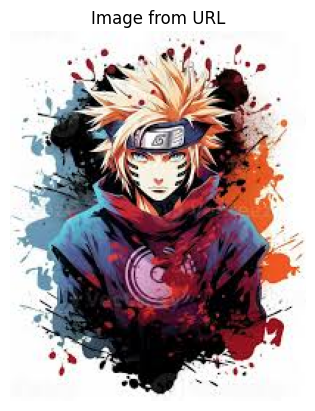

In [4]:
plt.imshow(img_rgb)
plt.axis('off')
plt.title("Image from URL")
plt.show()

In [5]:
height, width = image.shape[:2]
center_x, center_y = width // 2, height // 2
region = image[center_y - 50:center_y + 50, center_x - 50:center_x + 50]


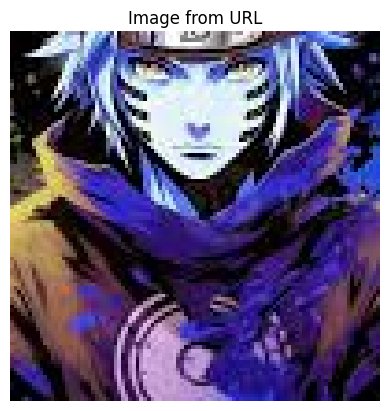

In [6]:
plt.imshow(region)
plt.axis('off')
plt.title("Image from URL")
plt.show()

In [ ]:
hsv_image = cv2.cvtColor(region, cv2.COLOR_BGR2HSV)
hue, saturation, value = cv2.split(hsv_image)

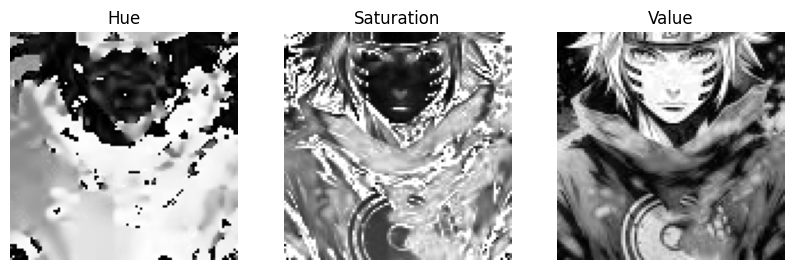

In [ ]:
plt.figure(figsize=(10, 3))
for i, (channel, title) in enumerate(zip([hue, saturation, value], ['Hue', 'Saturation', 'Value'])):
    plt.subplot(1, 3, i+1)
    plt.imshow(channel, cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.show()